# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import os
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#api_key

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

584
palora


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={api_key}&q="

#cities = ["Paris", "blahblah", "Oslo", "Beijing"]

# set up lists to hold reponse info
city_lst = []
cloudiness_lst = []
country_lst = []
date_lst = []
humidity_lst = []
lat_lst = []
lng_lst = []
max_temp_lst = []
wind_speed_lst =[]
log_var = []

if os.path.exists("citylog.log"):
  os.remove("citylog.log")
else:
  print("citylog.log")

# Loop through the list of cities and perform a request for data on each
x = 1
x2 = 1
with open("citylog.log","a") as citylog:
    citylog.write("Beginning Data Retrieval\n")
    print("Beginning Data Retrieval")
    citylog.write("------------------------\n")
    print("------------------------")
for city in cities:
    with open("citylog.log","a") as citylog:
        citylog.write(f"Processing Record {x} of set {x2} | {city}\n")
        citylog.write(query_url + city + "\n")
    
    response = requests.get(query_url + city).json()
    response_str = str(response)
    if "city not found" not in response_str:
        print (f"Processing record {x} of set {x2} | {city}")
        #print (f"this city werks - {city}")
        log_var.append("\n" + str(response) + "\n")
        city_lst.append(city)
        cloudiness_lst.append(response['clouds']['all'])
        country_lst.append(response['sys']['country'])
        date_lst.append(response['dt'])
        humidity_lst.append(response['main']['humidity'])
        lat_lst.append(response['coord']['lat'])
        lng_lst.append(response['coord']['lon'])
        max_temp_lst.append(response['main']['temp'])
        wind_speed_lst.append(response['wind']['speed'])
        time.sleep(.5)
        #print (f"Sleep 2 row {x}")
        x += 1
        if x % 50 == 0:
            x = 1
            x2 += 1
    else:
        print (f"Processing record {x} of set {x2} | {city}")
        print("City not found.  Skipping...")
        #print (f"***this city sucks***- {city}")
        with open("citylog.log","a") as citylog:     
            citylog.write("City not found.  Skipping...\n")
        x += 1   

 # create a data frame from cities, lat, and temp
weather_dict = {
     "City": city_lst,
     "Cloudiness": cloudiness_lst,
     "Country": country_lst,
     "Date": date_lst,
     "Humidity": humidity_lst,
     "Lat": lat_lst,
     "Lng": lng_lst,
     "Max Temp": max_temp_lst,
     "Wind Speed": wind_speed_lst
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()
#pprint.pprint(response)
#type (weather_df)
#type(response)


citylog.log
Beginning Data Retrieval
------------------------
Processing record 1 of set 1 | palora
Processing record 2 of set 1 | yellowknife
Processing record 3 of set 1 | hobart
Processing record 4 of set 1 | ambalavao
Processing record 5 of set 1 | palana
Processing record 6 of set 1 | punta arenas
Processing record 7 of set 1 | springbok
Processing record 8 of set 1 | qaanaaq
Processing record 9 of set 1 | upernavik
Processing record 10 of set 1 | lasa
Processing record 11 of set 1 | poum
Processing record 12 of set 1 | norman wells
Processing record 13 of set 1 | nguiu
City not found.  Skipping...
Processing record 14 of set 1 | namatanai
Processing record 15 of set 1 | arraial do cabo
Processing record 16 of set 1 | lagoa
Processing record 17 of set 1 | ushuaia
Processing record 18 of set 1 | busselton
Processing record 19 of set 1 | atuona
Processing record 20 of set 1 | bandarbeyla
Processing record 21 of set 1 | katsuura
Processing record 22 of set 1 | abu zabad
Processing re

Processing record 36 of set 4 | xifeng
Processing record 37 of set 4 | dukat
Processing record 38 of set 4 | sao felix do xingu
Processing record 39 of set 4 | nisko
Processing record 40 of set 4 | naryan-mar
Processing record 41 of set 4 | saint-augustin
Processing record 42 of set 4 | cardston
Processing record 43 of set 4 | saleaula
City not found.  Skipping...
Processing record 44 of set 4 | kangaatsiaq
Processing record 45 of set 4 | nichinan
Processing record 46 of set 4 | kavieng
Processing record 47 of set 4 | cabo san lucas
Processing record 48 of set 4 | grand river south east
City not found.  Skipping...
Processing record 49 of set 4 | singapore
Processing record 1 of set 5 | cherskiy
Processing record 2 of set 5 | butaritari
Processing record 3 of set 5 | bandrele
Processing record 4 of set 5 | touros
Processing record 5 of set 5 | san cristobal
Processing record 6 of set 5 | paamiut
Processing record 7 of set 5 | ambilobe
Processing record 8 of set 5 | descalvado
Processin

City not found.  Skipping...
Processing record 73 of set 7 | daru
Processing record 74 of set 7 | merrill
Processing record 75 of set 7 | guerrero negro
Processing record 76 of set 7 | severobaykalsk
Processing record 77 of set 7 | padang
Processing record 78 of set 7 | kupang
Processing record 79 of set 7 | pemba
Processing record 80 of set 7 | husavik
Processing record 81 of set 7 | luwingu
Processing record 82 of set 7 | lodingen
Processing record 83 of set 7 | carnarvon
Processing record 84 of set 7 | port blair
Processing record 85 of set 7 | nemuro
Processing record 86 of set 7 | la ronge
Processing record 87 of set 7 | saint anthony
Processing record 88 of set 7 | hue
Processing record 89 of set 7 | japura
Processing record 90 of set 7 | sayyan
Processing record 91 of set 7 | nianzishan
Processing record 92 of set 7 | sitka
Processing record 93 of set 7 | nuuk
Processing record 94 of set 7 | ribeira grande
Processing record 95 of set 7 | manokwari
Processing record 96 of set 7 |

Processing record 12 of set 11 | tual
Processing record 13 of set 11 | benguela
Processing record 14 of set 11 | hovd
Processing record 15 of set 11 | chake chake
Processing record 16 of set 11 | berbera
City not found.  Skipping...
Processing record 17 of set 11 | yarada
Processing record 18 of set 11 | eureka
Processing record 19 of set 11 | tocopilla
Processing record 20 of set 11 | luganville
Processing record 21 of set 11 | oiso
Processing record 22 of set 11 | krasnyy profintern
Processing record 23 of set 11 | tezu
Processing record 24 of set 11 | maldonado
Processing record 25 of set 11 | socorro
Processing record 26 of set 11 | dunedin
Processing record 27 of set 11 | beyneu
Processing record 28 of set 11 | hundested
Processing record 29 of set 11 | tynda
Processing record 30 of set 11 | arkhara
Processing record 31 of set 11 | anadyr
Processing record 32 of set 11 | bayir
Processing record 33 of set 11 | redlands
Processing record 34 of set 11 | rognan
Processing record 35 of

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,palora,75,EC,1566606966,73,-1.70,-77.97,70.02,3.36
1,yellowknife,90,CA,1566606967,67,62.45,-114.38,57.20,14.99
2,hobart,75,AU,1566606823,44,-42.88,147.33,58.60,12.75
3,ambalavao,0,MG,1566606968,89,-21.83,46.94,53.61,4.92
4,palana,100,RU,1566606969,93,59.08,159.95,51.52,6.62


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.to_csv("weatherdata.csv")

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,palora,75,EC,1566606966,73,-1.70,-77.97,70.02,3.36
1,yellowknife,90,CA,1566606967,67,62.45,-114.38,57.20,14.99
2,hobart,75,AU,1566606823,44,-42.88,147.33,58.60,12.75
3,ambalavao,0,MG,1566606968,89,-21.83,46.94,53.61,4.92
4,palana,100,RU,1566606969,93,59.08,159.95,51.52,6.62


In [9]:
weather_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

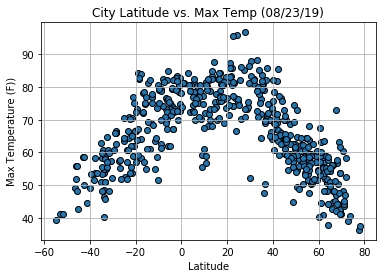

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors="black")

#now_dt = date.today().strftime('%m/%d/%y')
now_dt = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%m/%d/%y')
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temp ({now_dt})")
plt.ylabel("Max Temperature (F))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvsmaxtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

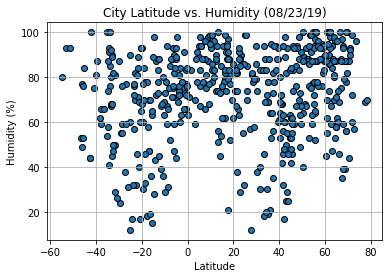

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({now_dt})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvshumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

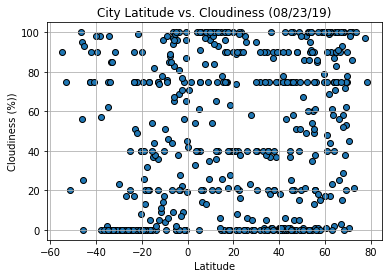

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({now_dt})")
plt.ylabel("Cloudiness (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvscloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

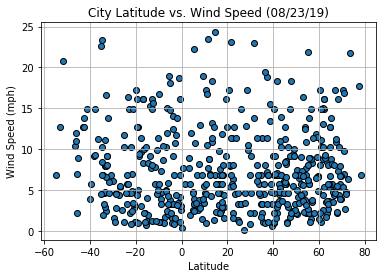

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({now_dt})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latvswind.png")

# Show plot
plt.show()